In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/EuroSAT (2).zip"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/EuroSAT")  # Extract to a folder

    print("Files extracted successfully!")


Files extracted successfully!


Classes: ['Industrial', 'River', 'Residential', 'AnnualCrop', 'PermanentCrop', 'Forest', 'Highway', 'SeaLake', 'Pasture', 'HerbaceousVegetation']
Image counts: {'Industrial': 2500, 'River': 2500, 'Residential': 3000, 'AnnualCrop': 3000, 'PermanentCrop': 2500, 'Forest': 3000, 'Highway': 2500, 'SeaLake': 3000, 'Pasture': 2000, 'HerbaceousVegetation': 3000}


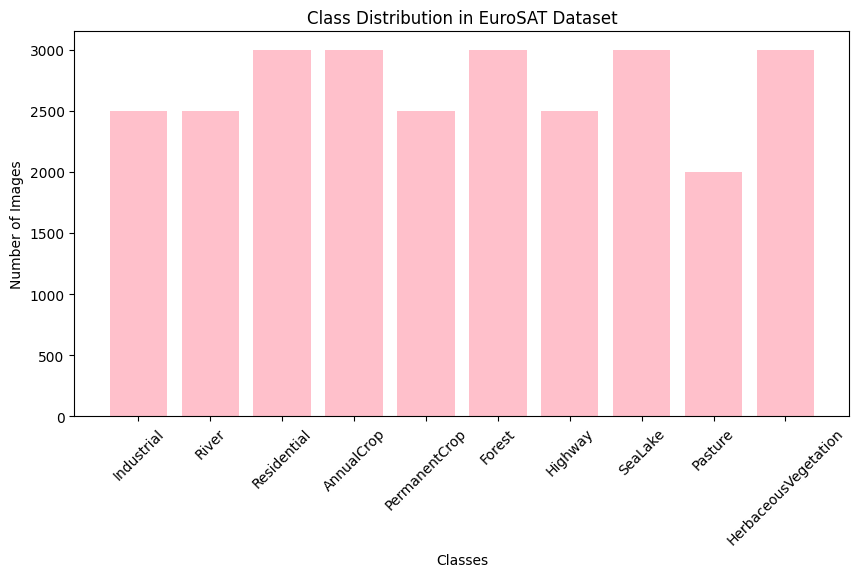

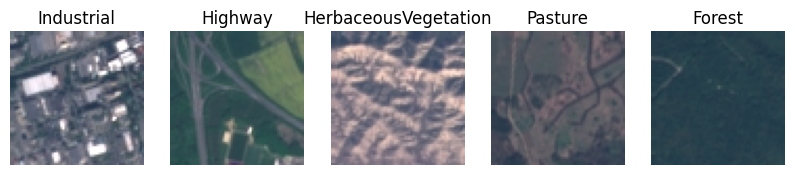

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from glob import glob
from PIL import Image

# Define dataset path (Update this with your actual path)
dataset_path = "/content/EuroSAT/2750"

# Get class names
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Classes:", class_dirs)

# Count images per class
image_counts = {cls: len(glob(os.path.join(dataset_path, cls, "*.jpg"))) for cls in class_dirs}
print("Image counts:", image_counts)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values(), color='pink')
plt.xticks(rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in EuroSAT Dataset")
plt.show()

# Display some sample images
plt.figure(figsize=(10, 5))
for i, cls in enumerate(random.sample(class_dirs, 5)):  # Show 5 random classes
    img_path = random.choice(glob(os.path.join(dataset_path, cls, "*.jpg")))
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = (64, 64)  # Resizing images to 64x64
BATCH_SIZE = 32

# Data augmentation & preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train generator (we'll use this to load images)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Compute mean pixel values for each channel (R, G, B) across the dataset
features = []

for _ in range(300):  # Load a sample of images (adjust the number as needed)
    x_batch, _ = next(train_generator)
    for img in x_batch:
        r_mean = np.mean(img[:,:,0])  # Red channel mean
        g_mean = np.mean(img[:,:,1])  # Green channel mean
        b_mean = np.mean(img[:,:,2])  # Blue channel mean
        features.append([r_mean, g_mean, b_mean])

# Convert to DataFrame
df_features = pd.DataFrame(features, columns=['Red_Mean', 'Green_Mean', 'Blue_Mean'])

Found 21600 images belonging to 10 classes.


Found 21600 images belonging to 10 classes.


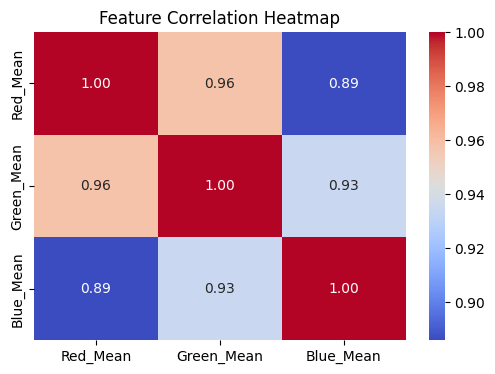

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = (64, 64)  # Resizing images to 64x64
BATCH_SIZE = 32

# Data augmentation & preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
# Compute mean pixel values for each channel (R, G, B) across the dataset
features = []

for _ in range(300):  # Load a sample of images (adjust the number as needed)
    x_batch, _ = next(train_generator)
    for img in x_batch:
        r_mean = np.mean(img[:,:,0])  # Red channel mean
        g_mean = np.mean(img[:,:,1])  # Green channel mean
        b_mean = np.mean(img[:,:,2])  # Blue channel mean
        features.append([r_mean, g_mean, b_mean])

# Convert to DataFrame
df_features = pd.DataFrame(features, columns=['Red_Mean', 'Green_Mean', 'Blue_Mean'])

# Plot heatmap correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = (64, 64)  # Resizing images to 64x64
BATCH_SIZE = 32

# Data augmentation & preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("Class Indices:", train_generator.class_indices)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Class Indices: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
# Grayscale Image Generators
grayscale_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

grayscale_train_generator = grayscale_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

grayscale_val_generator = grayscale_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Train the model
history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=50)

# Save the model
cnn_model.save("/content/drive/MyDrive/eurosat_cnn.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3687 - loss: 1.6561 - val_accuracy: 0.6565 - val_loss: 0.9941
Epoch 2/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6349 - loss: 1.0356 - val_accuracy: 0.6939 - val_loss: 0.8146
Epoch 3/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7033 - loss: 0.8567 - val_accuracy: 0.7719 - val_loss: 0.6483
Epoch 4/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7354 - loss: 0.7602 - val_accuracy: 0.7541 - val_loss: 0.6874
Epoch 5/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7351 - loss: 0.7483 - val_accuracy: 0.7793 - val_loss: 0.6295
Epoch 6/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7758 - loss: 0.6448 - val_accuracy: 0.7794 - val_loss: 0.6187
Epoch 7/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7939 - loss: 0.5977 - val_accuracy: 0.8031 - val_loss: 0.5697
Epoch 8/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7998 - loss: 0.5751 - val_accurac

In [ ]:
import numpy as np
from scipy import stats  # Import the stats module from SciPy

mean_diff = df_features['Red_Mean'].mean() - df_features['Green_Mean'].mean()
se_diff = np.sqrt(
    df_features['Red_Mean'].var()/len(df_features) +
    df_features['Green_Mean'].var()/len(df_features)
)
z_stat = mean_diff / se_diff
p_z = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))  # Now stats is defined

print("Z-test (Red vs Green):")
print("Z-statistic:", z_stat)
print("P-value:", p_z)
print()

# --- T-test: Split Red_Mean into two halves ---
split = len(df_features) // 2
t_stat, p_t = stats.ttest_ind(
    df_features['Red_Mean'][:split],
    df_features['Red_Mean'][split:]
)

print("T-test (Red halves):")
print("T-statistic:", t_stat)
print("P-value:", p_t)
print()

# --- ANOVA: Red vs Green vs Blue ---
f_stat, p_anova = stats.f_oneway(
    df_features['Red_Mean'],
    df_features['Green_Mean'],
    df_features['Blue_Mean']
)

print("ANOVA (RGB):")
print("F-statistic:", f_stat)
print("P-value:", p_anova)

Z-test (Red vs Green):
Z-statistic: -17.519894319767538
P-value: 0.0

T-test (Red halves):
T-statistic: 1.1181062482418762
P-value: 0.2635496025077605

ANOVA (RGB):
F-statistic: 586.0869
P-value: 0.0


In [ ]:
from tensorflow.keras.models import load_model

# Save model
cnn_model.save("/content/drive/MyDrive/eurosat_cnn.h5")

# Load model for future use
cnn_loaded = load_model("/content/drive/MyDrive/eurosat_cnn.h5")

print("Models successfully saved and reloaded!")


Models successfully saved and reloaded!


Predictions from Simple CNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


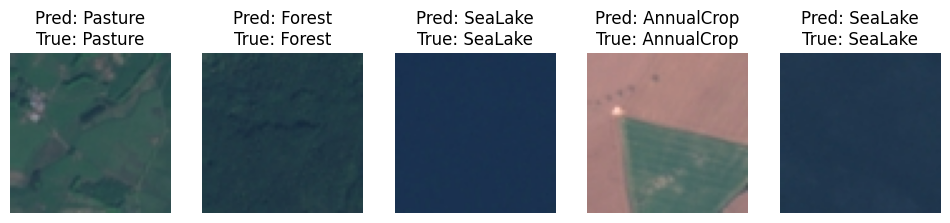

In [ ]:
def show_predictions(model, generator):
    x_batch, y_batch = next(generator)  # Get a batch of images
    predictions = model.predict(x_batch)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 6))
    for i in range(5):  # Display 5 sample images
        plt.subplot(1, 5, i+1)
        img = x_batch[i]
        plt.imshow(img)
        pred_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[np.argmax(y_batch[i])]
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}")
        plt.axis("off")
    plt.show()

# Show predictions for Simple CNN
print("Predictions from Simple CNN:")
show_predictions(cnn_model, val_generator)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.85      0.81      0.83        36
              Forest       0.95      0.97      0.96        38
HerbaceousVegetation       0.71      0.74      0.72        34
             Highway       0.81      0.67      0.73        33
          Industrial       0.86      0.79      0.83        39
             Pasture       0.58      0.73      0.65        15
       PermanentCrop       0.61      0.63      0.62        35
         Residential       0.78      0.97      0.86        32
               River       0.81      

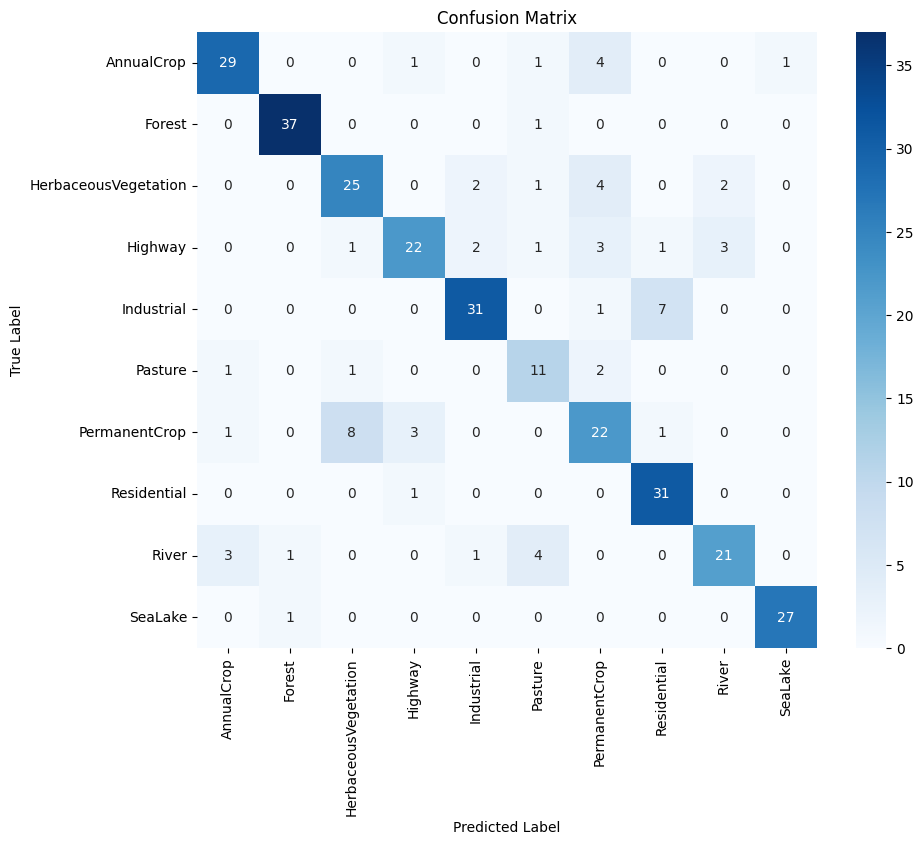

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for _ in range(10):  # Iterate over a few batches
    x_batch, y_batch = next(val_generator)
    preds = cnn_loaded.predict(x_batch)

    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Convert class indices to class names
class_names = list(train_generator.class_indices.keys())

# Generate Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
